In [1]:
import pandas as pd     
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Q7 Cars: Calculate Mean, Median, Mode, Variance, Standard Deviation & Range

In [2]:
cars = pd.read_csv("Q7.csv")
cars.head()

,Cars,Points,Score,Weigh
0,Mazda RX4,3.90,2.620,16.46
1,Mazda RX4 Wag,3.90,2.875,17.02
2,Datsun 710,3.85,2.320,18.61
3,Hornet 4 Drive,3.08,3.215,19.44
4,Hornet Sportabout,3.15,3.440,17.02


In [3]:
cars.drop('Cars',inplace=True,axis=1)
Label = pd.DataFrame([cars.mean().values,
                        cars.median().values,
                        cars.mode().values[0],
                        cars.var().values,
                        cars.std().values, 
                        (cars.max()-cars.min()).values],
                        columns=cars.columns)
Label.insert(0,column ='Label',value=np.array(['Mean',
                                              'Median',
                                              'Mode',
                                               'Variance',
                                               'Standard Deviation',
                                               'Range']).reshape(6,1))
Label

,Label,Points,Score,Weigh
0,Mean,3.596563,3.217250,17.848750
1,Median,3.695000,3.325000,17.710000
2,Mode,3.070000,3.440000,17.020000
3,Variance,0.285881,0.957379,3.193166
4,Standard Deviation,0.534679,0.978457,1.786943
5,Range,2.170000,3.911000,8.400000


### Q9 Cars’ speed and distance. Calculate Skewness, Kurtosis
### a) Calculate Skewness

In [4]:
cars = pd.read_csv("Q9_a.csv")
cars.head()

,Index,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [5]:
cars = pd.read_csv('Q9_a.csv')
cars.drop('Index',axis=1,inplace=True)
Label = pd.DataFrame([cars.skew().values,
                        cars.kurt().values],
                        columns = cars.columns)
Label.insert(0,column='Moments',value=np.array(['Skew',
                                                  'Kurtosis']).reshape(2,1))
Label

,Moments,speed,dist
0,Skew,-0.117510,0.806895
1,Kurtosis,-0.508994,0.405053


### b) Calculate Kurtosis

In [6]:
cars = pd.read_csv('Q9_b.csv')
cars.drop('Unnamed: 0',axis=1,inplace=True)
Label = pd.DataFrame([cars.skew().values,
                        cars.kurt().values],
                        columns = cars.columns)
Label.insert(0,column='Moments',value=np.array(['Skew',
                                                  'Kurtosis']).reshape(2,1))
Label

,Moments,SP,WT
0,Skew,1.611450,-0.614753
1,Kurtosis,2.977329,0.950291


### Q11 Calculate 94%, 98%, 96% Confidence Interval

In [7]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [8]:
# Avg. weight of Adult in Mexico with 94% CI
stats.norm.interval(0.94,200,30/(2000**0.5))
(198.738325292158, 201.261674707842)

(198.738325292158, 201.261674707842)

In [9]:
# Avg. weight of Adult in Mexico with 98% CI
stats.norm.interval(0.98,200,30/(2000**0.5))
(198.43943840429978, 201.56056159570022)

(198.43943840429978, 201.56056159570022)

In [10]:
# Avg. weight of Adult in Mexico with 96% CI
stats.norm.interval(0.96,200,30/(2000**0.5))
(198.62230334813333, 201.37769665186667)

(198.62230334813333, 201.37769665186667)

## Q12
### 1) Find mean, median, variance, standard deviation

In [11]:
calc = [['Mean',np.mean],
        ['Median',np.median],
        ['Variance',np.var],
        ['Standard Deviation',np.std]]
scores = np.array([34,36,36,38,38,39,39,40,40,41,41,41,41,42,42,45,49,56])
Label = pd.DataFrame([[x[0],round(x[1](scores),2)] for x in calc],
                      columns=['Label','values'])
Label

,Label,values
0,Mean,41.00
1,Median,40.50
2,Variance,24.11
3,Standard Deviation,4.91


## Q20 Calculate the probability of MPG of Cars for the below cases.

In [12]:
cars = pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [13]:
cars = pd.read_csv('Cars.csv')

def cdf(x):
    return stats.norm.cdf(x,loc=cars.describe().loc['mean']['MPG'],
                          scale=cars.describe().loc['std']['MPG'])

cars = pd.DataFrame([['P(MPG) > 38',1-cdf(38)],
                     ['P(MPG) < 40',cdf(40)],
                     ['P(20', cdf(50) - cdf(20)]], 
                     columns= ['condition','Probablity'])
cars

,condition,Probablity
0,P(MPG) > 38,0.347594
1,P(MPG) < 40,0.729350
2,P(20,0.898869


## Q21 
### a) Check whether the MPG of Cars follows Normal Distribution

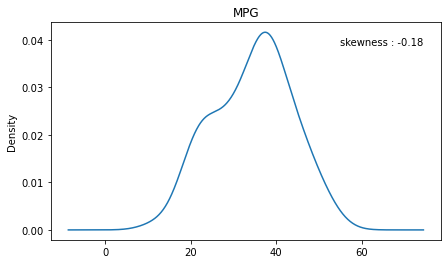

In [14]:
cars = pd.read_csv('Cars.csv')

mpg = cars.MPG
plt.figure(figsize=(7,4))
mpg.plot(kind='kde')
plt.figtext(0.7,0.8,f'skewness : {round(mpg.skew(),2)}')
plt.title('MPG')
plt.show()
# it can be inferred from visual
# as well as statical inspection
# that MPG dataset indeed 
# follows normal distribution

### b) Check Whether the Adipose Tissue (AT) and Waist Circumference(Waist) 
### from wc-at data set follows Normal Distribution

In [15]:
cars = pd.read_csv('Q20-21 wc-at.csv')
cars.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


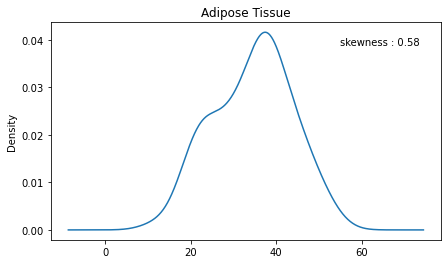

In [16]:
at = cars.AT
plt.figure(figsize=(7,4))
mpg.plot(kind='kde')
plt.figtext(0.7,0.8,f'skewness : {round(at.skew(),2)}')
plt.title('Adipose Tissue')
plt.show()
# it can be inferred from visual
# as well as statical inspection
# that Adipose tissue dataset indeed 
# follows normal distribution

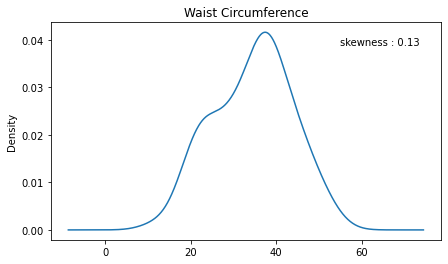

In [17]:
waist = cars.Waist
plt.figure(figsize=(7,4))
mpg.plot(kind='kde')
plt.figtext(0.7,0.8,f'skewness : {round(waist.skew(),2)}')
plt.title('Waist Circumference')
plt.show()
# it can be inferred from visual
# as well as statical inspection
# that Waist Circumference dataset indeed 
# follows normal distribution

### Q22 Calculate the Z scores of 90%,94% & 60% confidence interval

In [18]:
def zScore(cl):
    return round(stats.norm.ppf((1+cl/100)/2),2)
CI = [60,95,96]
zscore = pd.DataFrame([[x, zScore(x)] for x in CI],
                      columns=['CI','Z-Score'])
zscore

,CI,Z-Score
0,60,0.84
1,95,1.96
2,96,2.05


### Q23 Calculate the T scores of 90%,94% & 60% confidence interval

In [19]:
sampleSize = 25
CI = [95,96,99]
def tScore(cl):
    global sampleSize
    return round(stats.t.ppf((1+cl/100)/2,df = sampleSize-1),2)
tscore = pd.DataFrame([[x, tScore(x)] for x in CI],
                      columns=['CI',f'T-Score for N = {sampleSize}'])
tscore

,CI,T-Score for N = 25
0,95,2.06
1,96,2.17
2,99,2.80


### Q24 Probability that 18 randomly selected bulbs would have an average life of no more than 260 days

In [20]:
sampleSize = 18
xBar = 260
S = 90
prob = pd.DataFrame([['P(aveLife <= 260)',
                     stats.t.cdf(xBar,df=sampleSize-1,scale=S)]],
                   columns=['condition','Probability'])
prob

,condition,Probability
0,P(aveLife <= 260),0.9949
